一个简单的例子，线性模型$y = \alpha  + \beta x$的拟合

# 生成数据

In [1]:
#导入模块
import numpy as np

In [2]:
x = np.random.random(30)
x

array([0.42452532, 0.40418781, 0.07195889, 0.5055115 , 0.16030499,
       0.18325523, 0.63639524, 0.43900463, 0.69081977, 0.22780341,
       0.08829483, 0.95838608, 0.66947451, 0.3680919 , 0.10061667,
       0.33248928, 0.34562526, 0.43188087, 0.12120206, 0.80211084,
       0.06207119, 0.89745292, 0.15514189, 0.58914218, 0.15613369,
       0.93363454, 0.14819492, 0.25384424, 0.96346615, 0.15224268])

In [3]:
help(np.random.random)

Help on built-in function random:

random(...) method of numpy.random.mtrand.RandomState instance
    random(size=None)
    
    Return random floats in the half-open interval [0.0, 1.0). Alias for
    `random_sample` to ease forward-porting to the new random API.



In [4]:
x = 10 * x
x

array([4.24525319, 4.04187814, 0.71958889, 5.05511504, 1.60304991,
       1.83255232, 6.36395237, 4.39004629, 6.90819773, 2.27803415,
       0.88294827, 9.5838608 , 6.69474509, 3.68091896, 1.00616672,
       3.32489284, 3.45625258, 4.31880874, 1.21202059, 8.02110837,
       0.62071195, 8.97452923, 1.55141891, 5.89142177, 1.56133694,
       9.33634536, 1.48194919, 2.53844243, 9.63466151, 1.52242684])

In [5]:
y = 20*x + 3
y

array([ 87.90506379,  83.83756275,  17.39177776, 104.1023008 ,
        35.06099814,  39.65104649, 130.27904749,  90.80092585,
       141.16395457,  48.56068295,  20.65896535, 194.67721594,
       136.89490188,  76.61837917,  23.12333431,  69.4978568 ,
        72.12505151,  89.37617478,  27.24041187, 163.42216739,
        15.41423895, 182.49058469,  34.02837829, 120.82843535,
        34.22673881, 189.72690726,  32.63898379,  53.76884864,
       195.69323026,  33.44853672])

增加扰动项：$y = ax + b + \varepsilon $

In [6]:
y = 20 * x + 3 + np.random.randn(30)
y

array([ 86.7186995 ,  83.76532587,  16.61467588, 103.06536677,
        33.44388936,  38.07220203, 130.6020166 ,  91.53290525,
       142.43222684,  49.31046201,  20.008097  , 195.54849496,
       136.26223558,  76.19324217,  22.19812268,  71.39073863,
        72.56316581,  88.09664645,  26.26210502, 163.76765155,
        16.2412232 , 183.03363329,  33.56252435, 119.81349223,
        32.97091276, 190.50356615,  32.01029425,  54.92122734,
       193.94702758,  32.01556351])

## 绘制散点图 

In [7]:
from plotnine import *
import pandas as pd
%matplotlib inline

In [8]:
x_y = pd.DataFrame({'x':x, 'y':y})
x_y.sample(10)

,x,y
14,1.006167,22.198123
22,1.551419,33.562524
27,2.538442,54.921227
15,3.324893,71.390739
28,9.634662,193.947028
12,6.694745,136.262236
7,4.390046,91.532905
18,1.212021,26.262105
23,5.891422,119.813492
26,1.481949,32.010294


In [9]:
x_y.describe()

,x,y
count,30.000000,30.000000
mean,4.091088,84.562258
std,2.923376,58.745000
min,0.620712,16.241223
25%,1.553898,33.089157
50%,3.568586,74.378204
75%,6.245820,127.904886
max,9.634662,195.548495


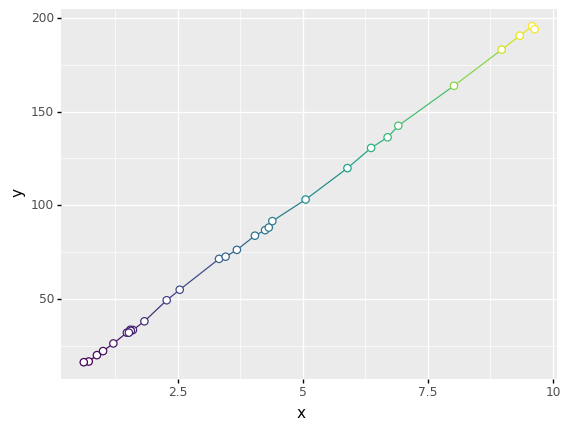

<ggplot: (131954057066)>

In [10]:
(
    ggplot(x_y, aes(x='x', y='y', colour='x+y')) +
    geom_line() +
    geom_point(fill='white', size=2.5) +
    theme(legend_position='none')
)

## 模型拟合

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
reg = LinearRegression()

In [13]:
x = x.reshape(-1, 1)

In [14]:
reg.fit(x, y)

LinearRegression()

In [15]:
print("Fitted lm model is y={:.3}x+{:.3}".format(reg.coef_[0], reg.intercept_))

Fitted lm model is y=20.1x+2.36


## 拟合效果

In [16]:
yhat = reg.predict(x)
yhat

array([ 87.65977646,  83.57352747,  16.82148017, 103.93166987,
        34.57214163,  39.18334645, 130.22907059,  90.56898614,
       141.16414845,  48.13404927,  20.1037269 , 194.92406347,
       136.87541881,  76.32106919,  22.57945465,  69.16772686,
        71.80703085,  89.13766811,  26.71550866, 163.52495396,
        14.83482648, 182.68126152,  33.53476222, 120.73489863,
        33.73403702, 189.95093779,  32.13896371,  53.36622046,
       195.9447608 ,  32.95224804])

In [17]:
x_y_yhat = pd.DataFrame({'x':x.flatten(), 'y':y, 'yhat':yhat})

In [18]:
x_y_yhat_melt = pd.melt(x_y_yhat, id_vars='x', var_name='y_type', value_name='value')
x_y_yhat_melt.sample(10)

,x,y_type,value
58,9.634662,yhat,195.944761
23,5.891422,y,119.813492
41,9.583861,yhat,194.924063
30,4.245253,yhat,87.659776
27,2.538442,y,54.921227
1,4.041878,y,83.765326
38,6.908198,yhat,141.164148
20,0.620712,y,16.241223
44,1.006167,yhat,22.579455
31,4.041878,yhat,83.573527


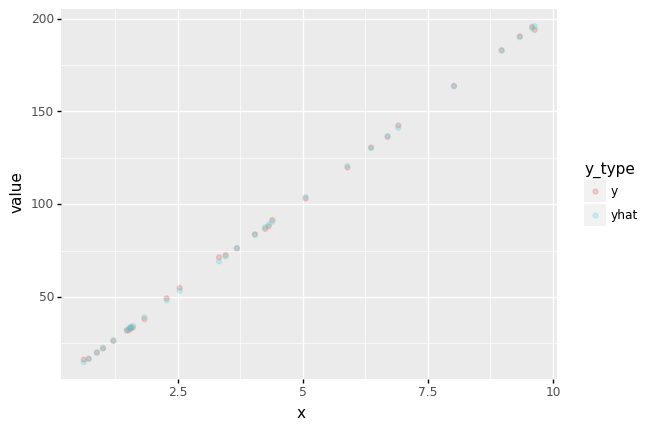

<ggplot: (131954697099)>

In [19]:
(
    ggplot(x_y_yhat_melt, aes(x='x', y='value', colour='y_type')) +
    geom_point(alpha=0.25)
)

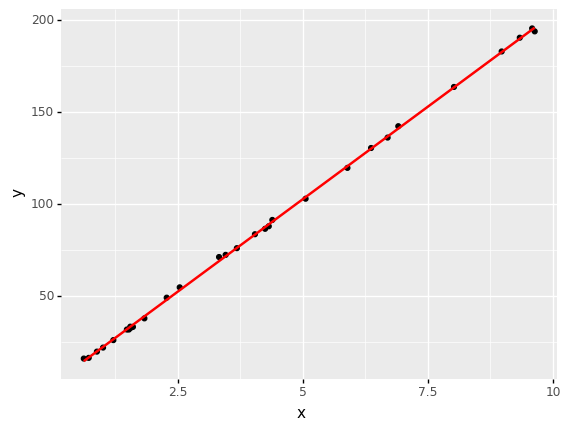

<ggplot: (131954697186)>

In [20]:
(
    ggplot(x_y, aes(x='x', y='y')) +
    geom_point() +
    geom_smooth(method='lm', color='red')
)

In [21]:
from statsmodels.api import OLS

In [22]:
lm2 = OLS(x, y).fit()

In [23]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.104e+05
Date:                Tue, 16 Mar 2021   Prob (F-statistic):                    1.76e-53
Time:                        16:37:56   Log-Likelihood:                          32.825
No. Observations:                  30   AIC:                                     -63.65
Df Residuals:                      29   BIC:                                     -62.25
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0488      0.000    332.301      0.000       0.049       0.049
==============================================================================
Omnibus:                        1.971   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.373   Jarque-Bera (JB):                0.944
Skew:                           0.388   Prob(JB):                        0.624
Kurtosis:                       3.392   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""